In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I took this Data Set from https://www.kaggle.com/datasets/asinow/car-price-dataset/data

In [2]:
df = pd.read_csv('car_price_dataset.csv')

In [3]:
df.shape

(10000, 10)

****Columns Descriptions:

Brand: Specifies the brand of the car (e.g., Toyota, BMW, Ford).
Example values: "Toyota", "BMW", "Mercedes".

Model: Specifies the model of the car (e.g., Corolla, Focus, X5).
Example values: "Corolla", "Focus", "X5".

Year: The production year of the car. Newer years typically indicate higher prices.
Example values: 2005, 2018, 2023.

Engine_Size: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
Example values: 1.6, 2.0, 3.5.

Fuel_Type: indicates the type of fuel used by the car:
Petrol: Cars running on gasoline.
Diesel: Cars running on diesel fuel.
Hybrid: Cars that use both fuel and electricity.
Electric: Fully electric cars.

Transmission: The type of transmission in the car:
Manual: Manual transmission.
Automatic: Automatic transmission.
Semi-Automatic: Semi-automatic transmission.

Mileage: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
Example values: 15,000, 75,000, 230,000.

Doors: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
Example values: 2, 3, 4, 5.

Owner_Count: The number of previous owners of the car. Fewer owners generally indicate a higher price.
Example values: 1, 2, 3, 4.

Price:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.
Example values: 5,000, 15,000, 30,000.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


This data set has no empty values, so we don't have to do any fillings.

In [5]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


As we can see, there are no anomalies in this data set. However, we are preprocessing this data for machine learning, so we need to replace qualitative values with quantitative values. 
- For a fuel type, we will use these keys:
* Gasoline - 1
* Diesel - 2
* Hybrid - 3
* Electric - 4
- For a transmission type we will use these keys:
* Manual - 1
* Automatic - 2
* Semi-automatic - 3

In [6]:
fuelType = {
    'Petrol': 1,
    'Diesel': 2,
    'Hybrid': 3,
    'Electric': 4,
}

In [7]:
transmissionType = {
    'Manual': 1,
    'Automatic': 2,
    'Semi-Automatic': 3
}

In [8]:
test_df = pd.get_dummies(df, columns=['Brand', 'Model'], drop_first=True)

In [9]:
pd.set_option('future.no_silent_downcasting', True)
test_df['Fuel_Type'] = test_df['Fuel_Type'].replace(fuelType)
test_df['Transmission'] = test_df['Transmission'].replace(transmissionType)
test_df

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,2020,4.2,2,1,289944,3,5,8501,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,2.0,3,2,5356,2,3,12092,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2020,4.2,2,2,231440,4,2,11171,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,4,1,160971,2,1,11780,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2003,2.6,3,3,286618,3,3,2867,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,2,3,5794,2,4,8884,False,False,...,True,False,False,False,False,False,False,False,False,False
9996,2002,1.4,4,2,168000,2,1,6240,False,True,...,False,False,False,False,False,False,False,False,False,False
9997,2010,3.0,1,2,86664,5,1,9866,True,False,...,False,False,False,False,False,False,False,False,False,False
9998,2002,1.4,3,2,225772,4,1,4084,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
correlationMatrix = test_df.corr()
price_correlation = correlationMatrix['Price'].sort_values(ascending=False)
print(price_correlation)

Price               1.000000
Year                0.663036
Engine_Size         0.357403
Fuel_Type           0.249821
Model_Equinox       0.017578
Brand_Chevrolet     0.017456
Model_Tiguan        0.015091
Brand_Mercedes      0.013171
Model_GLA           0.011408
Model_Impala        0.009132
Model_Optima        0.008588
Model_Corolla       0.008459
Brand_Volkswagen    0.008166
Model_Fiesta        0.007365
Model_E-Class       0.006692
Model_Q5            0.006259
Model_A4            0.004100
Model_C-Class       0.003921
Model_Passat        0.003621
Model_A3            0.003567
Brand_Kia           0.002866
Model_Malibu        0.002696
Owner_Count         0.002656
Model_Sportage      0.000847
Doors               0.000511
Brand_Ford         -0.000043
Model_Explorer     -0.002871
Model_Elantra      -0.003076
Model_Tucson       -0.003786
Model_Rio          -0.004749
Model_Focus        -0.004754
Model_Golf         -0.005280
Brand_Toyota       -0.005768
Model_Sonata       -0.006540
Model_CR-V    

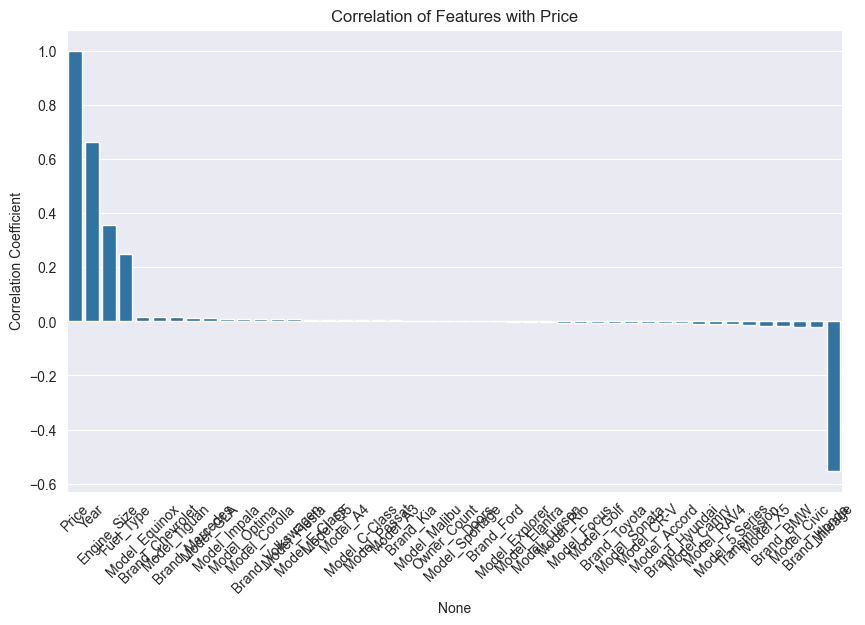

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index, y=price_correlation.values)
plt.title('Correlation of Features with Price')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.show()

In [12]:
columns_to_drop = [col for col in test_df.columns if col.startswith('Brand_') or col.startswith('Model_')]
cleaned_df = test_df.drop(columns=columns_to_drop)

In [13]:
cleanedCorrelationMatrix = cleaned_df.corr()
price_correlation = cleanedCorrelationMatrix['Price'].sort_values(ascending=False)
print(price_correlation)

Price           1.000000
Year            0.663036
Engine_Size     0.357403
Fuel_Type       0.249821
Owner_Count     0.002656
Doors           0.000511
Transmission   -0.011730
Mileage        -0.551227
Name: Price, dtype: float64


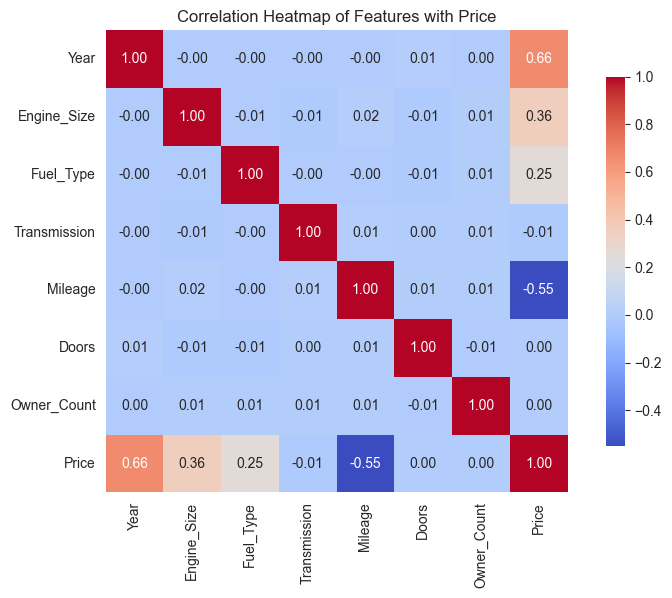

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(cleanedCorrelationMatrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features with Price')
plt.show()